In [1]:
import requests

In [8]:
#res 는 requests객체이다.
res = requests.get('http://www.naver.com') 
print(res)

<Response [200]>



<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메
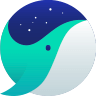
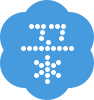

In [11]:
print(res.text)

requests 가져올수 있는데 수도으로는 힘들고 프로그램에 도움을 받아야한다.

In [13]:
from bs4 import BeautifulSoup

In [15]:
html = """<html><body><div><span>
        <a href=http://www.naver.com>naver</a>
        <a href=https://www.google.com>google</a>
        <a href=http://www.daum.net/>daum</a>
    </span></div></body></html>"""

In [17]:
soup = BeautifulSoup(html,'lxml') 

In [20]:
print(soup.prettify()) # 계층적으로 보고 싶을 때는 prettify()

<html>
 <body>
  <div>
   <span>
    <a href="http://www.naver.com">
     naver
    </a>
    <a href="https://www.google.com">
     google
    </a>
    <a href="http://www.daum.net/">
     daum
    </a>
   </span>
  </div>
 </body>
</html>


In [22]:
print(soup.find('a')) # 가장 첫번째 앤커 테크를 가져옴

<a href="http://www.naver.com">naver</a>


In [24]:
print(soup.find('a').get_text()) # get_text() 이름을 뽑아 내고 싶을 때 사용 

naver


In [26]:
print(soup.find_all('a'))  #find_all 로 뽑아내면 list로 뽑아줌

[<a href="http://www.naver.com">naver</a>, <a href="https://www.google.com">google</a>, <a href="http://www.daum.net/">daum</a>]


In [29]:
site_names = soup.find_all('a')  # 텍스트 파일 가져오기
for site in site_names:   #for문 돌리기
    print(site.get_text()) #get_text() 내용을 뽑아 보기

naver
google
daum


In [30]:
html2 = """
<html>
 <head>
  <title>작품과 작가 모음</title>
 </head>
 <body>
  <h1>책 정보</h1>
  <p id="book_title">토지</p>
  <p id="author">박경리</p>

  <p id="book_title">태백산맥</p>
  <p id="author">조정래</p>

  <p id="book_title">감옥으로부터의 사색</p>
  <p id="author">신영복</p>
 </body>
</html>
"""

In [35]:
soup2 = BeautifulSoup(html2,'lxml')

In [40]:
print(soup2.body) #태그 명 사용하면 불러온다.

<body>
<h1>책 정보</h1>
<p id="book_title">토지</p>
<p id="author">박경리</p>
<p id="book_title">태백산맥</p>
<p id="author">조정래</p>
<p id="book_title">감옥으로부터의 사색</p>
<p id="author">신영복</p>
</body>


In [41]:
print(soup2.h1)  #태그 명 사용하면 불러온다.

<h1>책 정보</h1>


In [45]:
print(soup2.find('p',{'id':'book_title'}))

<p id="book_title">토지</p>


In [47]:
print(soup2.find('p',{'id':'author'}))

<p id="author">박경리</p>


In [48]:
print(soup2.find_all('p',{'id':'book_title'}))

[<p id="book_title">토지</p>, <p id="book_title">태백산맥</p>, <p id="book_title">감옥으로부터의 사색</p>]


In [49]:
print(soup2.find_all('p',{'id':'author'}))

[<p id="author">박경리</p>, <p id="author">조정래</p>, <p id="author">신영복</p>]


토지/박경리
태백산맥/조정래
감옥으로부터의 사색/신영복 
이렇게 출력헤보기

In [57]:
books = soup2.find_all('p',{'id':'book_title'}) 
authors = soup2.find_all('p',{'id':'author'})
for book, author in zip(books, authors):  
    print(book.get_text() + '/' + author.get_text())

토지/박경리
태백산맥/조정래
감옥으로부터의 사색/신영복


In [59]:
print(soup2.select('body h1')) # 무조건 list로 가져오고 css에 select랑 비슷

[<h1>책 정보</h1>]


In [65]:
print(soup2.select('body h1')[0].text) #프로파티 불러도 결과값 똑같음

책 정보


In [66]:
print(soup2.select('body h1')[0].get_text())  # 함수 불러도 되고

책 정보


In [68]:
print(soup2.select('p'))

[<p id="book_title">토지</p>, <p id="author">박경리</p>, <p id="book_title">태백산맥</p>, <p id="author">조정래</p>, <p id="book_title">감옥으로부터의 사색</p>, <p id="author">신영복</p>]


In [78]:
print(soup2.select('p#book_title')) #css에 select를 가져옴 id

[<p id="book_title">토지</p>, <p id="book_title">태백산맥</p>, <p id="book_title">감옥으로부터의 사색</p>]


In [79]:
print(soup2.select('p#author')) #css에 select를 가져옴 id

[<p id="author">박경리</p>, <p id="author">조정래</p>, <p id="author">신영복</p>]


In [74]:
html3 = """
<!doctype html>
<html>
<head>
<meta charset="utf-8">
<title>사이트 모음</title>
</head>
<body>
<p id="title">
<b>자주 가는 사이트 모음</b>
</p>
<p id="contents">이곳은 자주 가는 사이트를 모아둔 곳입니다.</p>
<a href="http://www.naver.com" class="portal" id="naver">네이버</a> <br>
<a href="https://www.google.com" class="search" id="google">구글</a> <br>
<a href="http://www.daum.net" class="portal" id="daum">다음</a> <br>
<a href="http://www.nl.go.kr" class="government" id="nl">국립중앙도서관</a>
</body>
</html>
"""

In [75]:
soup3 = BeautifulSoup(html3, 'lxml')

In [77]:
print(soup3.select('a.portal')) #css에 select를 가져옴 class

[<a class="portal" href="http://www.naver.com" id="naver">네이버</a>, <a class="portal" href="http://www.daum.net" id="daum">다음</a>]
